#### Paracode

Laster ned moduler og filer, `module_update`, `nbtext` og `graph_networkx_louvain`

In [1]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [10]:
from module_update import update, css, code_toggle, printmd
update('nbtext', overwrite=True)
update('graph_networkx_louvain', overwrite=True)

Updated file `C:\Users\larsj\Documents\GitHub\xmining\nbtext.py`

Updated file `C:\Users\larsj\Documents\GitHub\xmining\graph_networkx_louvain.py`

Aktiver eller fjern `css`

In [8]:
css()

Importer moduler

In [75]:
import nbtext as nb
import graph_networkx_louvain as gnl
import pandas as pd
%matplotlib inline

Slår av advarsler fra IPython

In [82]:
import warnings
warnings.filterwarnings('ignore')

# Notebook for erosmining


In [4]:
urns = nb.get_urns_from_docx('../Materiale erotisk litteratur 1945-1970 liste 27.09.18.docx')
print('Antall URNer: ', len(urns), urns[:5])

Antall URNer:  456 ['2015090129001', '2011112308125', '2012021608164', '2016111748512', '2010111706020']


In [6]:
# rekonstruerer metadata for URN-ene
meta = [nb.metadata(u) for u in urns]

In [23]:
konk = lambda word, before=8, after=4, size=2: nb.get_urnkonk(word, {'urns':nb.refine_urn(urns,{'words':[word]} )[:30], 'before':before, 'after':after, 'size':size})

## Konkordanser

Bare kopier cellen og kjør flere ganger. Det tar noen sekunder, i og med at korpuset er såpass stort. Effektivisering er under planlegging.

In [227]:
konk('kjønnet')

"amerikansk drøm, Mailer, Norman, 1965","var levende på dypt vann , dypere enn",kjønnet,", en tunnel av"
"amerikansk drøm, Mailer, Norman, 1965","man oppdaget at det endelig er der ,",kjønnet,- men for en
"Lolita, Nabokov, Vladimir, 1959","har sagt , det er akkurat omvendt :",kjønnet,er bare kunstens tjenerinne
"Uten en tråd, Bjørneboe, Jens, 1966",seksual-moral som finnes ; du skal ikke bruke,kjønnet,ditt til å få
"Uten en tråd, Bjørneboe, Jens, 1966","fingrene om den bløte , utvendige delen av",kjønnet,hennes . Hun trakk
"Uten en tråd, Bjørneboe, Jens, 1966",stund holdt 2 & S bare hånden rundt,kjønnet,"hans , omkring fortykkelsen"
"Uten en tråd, Bjørneboe, Jens, 1966",Jeg tok omkring,kjønnet,hans og hørte at
"Kain, Anderberg, Bengt, 1949","eggende akkurat . Der gikk hun , med",kjønnet,lukket som et muslingskall
"Kruttårnet, Bjørneboe, Jens, 1969",smilte mens han åpnet buksene og trakk frem,kjønnet,som var hårdt og
"Kruttårnet, Bjørneboe, Jens, 1969",så ned mot underlivet hans og det strittende,kjønnet,. I praktisk talt
"Herfra til evigheten, Jones, James, 1953",Du er et tomt hylster og meningen med,kjønnet,"er borte , du"


## Næranalyse av en enkelt tekst

En eller flere ordlister for forskjellige formål. 

In [77]:
# Eksempel fra noen av ordene nevnt i den her sammenhengen
words = """brystene brystet låret lår lemmet presset presse presser stønnet stønne stønner leppene rev rive river flerret flerre flerrer
snerret snerre snerrer kjønnet grotten stivt slapt slapp stive stiv
 kikket kikke kikker stirret stirre stirrer""".split()

In [78]:
omsorg = """hverandre holdt ømt varsomt følelse følte nærhet nærheten""".split()

In [36]:
gladord = nb.relaterte_ord('glad, munter')

# Grafanalyse av ordene i en enkelt tekst

Her får du en graf som viser samforekomsten av ord. Det lages en kobling om ordene står i samme avsnitt. Det går også fint å lime en URN fra word-dokumentet.

In [72]:
print(nb.metadata(urns[30]))

[[2013042408063, 'Croudace, Glynn', 1969, 'Riflen og spydet', 'Bladkompaniet', 'nob', 'eng']]


In [79]:
G = nb.make_network(urns[30], wordbag=words+omsorg)

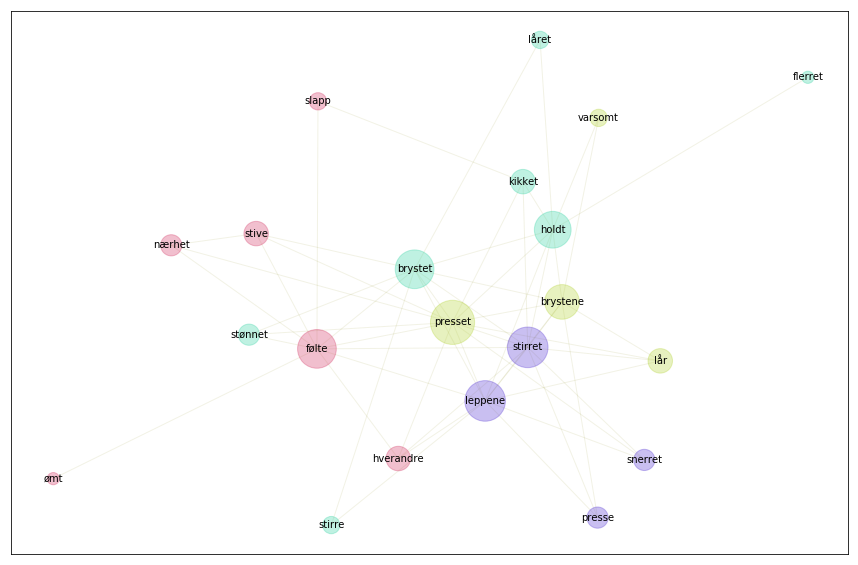

In [83]:
gnl.show_graph(G);

In [101]:
lemmet = nb.urn_coll('lemmet', urns)

In [104]:
urns[:3]

['2015090129001', '2011112308125', '2012021608164']

In [211]:
import requests
def normalize_corpus_dataframe(df):
    colsums = df.sum()
    for x in colsums.index:
        #print(x)
        df[x] = df[x].fillna(0)/colsums[x]
    return True

def urn_coll(word, urns=[], after=5, before=5, limit=1000):
    """Find collocations for a word in a set of books represented by URNs.
    Compute a collocation across the books, or pr. book. Both result in a one column dataframe representing
    the collocations.
    """
    
    if isinstance(urns[0], list):  # urns assumed to be list of list with urn-serial as first element
        urns = [u[0] for u in urns]
    
    r = requests.post("https://api.nb.no/ngram/urncoll", json={'word':word, 'urns':urns, 
                                                                   'after':after, 'before':before, 'limit':limit})
    res = pd.DataFrame.from_dict(r.json(), orient='index')
    if not res.empty:
        res = res.sort_values(by=res.columns[0], ascending = False)
    return res

def urn_coll_pr(word, urns=[], after=5, before=5, limit=1000):
        coll = dict()
        for urn in urns:
            cll = urn_coll(word, [urn], after=after, before=before, limit=limit)
            if not cll.empty:
                coll[urn] = cll
        colls = pd.DataFrame.from_dict(coll, orient='index' ).fillna(0)
        normalize_corpus_dataframe(colls)
        scoll = colls.mean(axis=1)
        res = pd.DataFrame(scoll.sort_values(ascending=False))


In [226]:
len(nb.refine_urn(urns, {'words':[ 'musa'], 'limit':len(urns)}))

4

In [216]:
fitta = urn_coll('fitta',urns=urns)
nb.normalize_corpus_dataframe(fitta)

True

In [217]:
compftt = collcomp(fitta[0], tot)

In [218]:
compftt

udyr           9033.577610
ballet         6364.938337
kul            2757.230672
klype          2576.314008
råtten         2436.308948
Stikk          1705.235244
drømt          1481.854001
Bortsett       1035.591446
fingeren       1008.071780
stukket         982.554915
flaske          750.124728
Alexander       728.144954
di              318.989098
kjørt           305.965855
glemte          278.846957
våknet          233.842313
stakk           229.602569
millioner       216.936047
jenter          209.687871
strøk           132.266631
åpnet           128.361118
ditt            118.907156
Kom              90.124977
akkurat          84.798669
te               80.553395
Jo               62.555513
sant             60.045229
blant            48.236683
ansiktet         47.153056
hennes           41.856236
                  ...     
übft                   NaN
übi                    NaN
übrukelig              NaN
übrukelige             NaN
übrukt                 NaN
übrutt                 NaN
ü

In [156]:
colls = pd.DataFrame.from_dict(ilem, orient='index').transpose()

In [185]:
for u in ilem:
    print(u, ilem[u][ilem[u] > 5])

2010111706020 Trekk       19471.965343
slappe      10597.711351
stakkars     5078.468276
greier       4485.701763
mer           118.698234
se            110.392707
noe            80.758398
dette          66.115703
om             20.453312
dtype: float64
2007052104043 dine    1081.492106
ditt    1070.164402
inne     596.371050
meg       71.082740
har       20.199802
det        7.856897
dtype: float64
2007050801042 Ovnene        32545.021492
innenfra       8217.866308
undersøker     6792.536027
lystig         6173.691105
myke           2288.777750
spissen        2180.178246
lukket          595.088378
sterke          469.725129
mitt            372.282865
Bom             238.673254
igjen            92.642812
mot              29.019749
opp              24.347468
ut               18.485292
Jeg              17.641747
seg               8.794970
det               5.237931
dtype: float64
2007051604017 Bt       9133.555937
kam      5198.389032
F         369.718973
rundt     268.892008
0         1

In [129]:
len(nb.refine_urn(urns, {'words':['lemmet'], 'limit':len(urns)}))

32

In [130]:
len([x for x in urns if not lem[x].empty])

46

In [135]:
for urn in urns:
    if urn in lem and lem[urn].empty:
        del lem[urn]

32

In [106]:
nb.urn_coll??

In [60]:
nb.normalize_corpus_dataframe(lemmet)

True

In [62]:
lemmet.head()

,0
",",0.059091
og,0.051515
.,0.041667
det,0.029545
hans,0.028030


In [39]:
tot = pd.Series(nb.totals(top=50000))

In [56]:
tot = tot/tot.sum()

In [52]:
korpus_text = nb.get_corpus_text(urns)

In [53]:
korpus_ord = korpus_text.sum(axis=1)

In [64]:
korpus_ord = korpus_ord/korpus_ord.sum()

In [65]:
korpus_ord

 Alexander                5.924223e-08
 Amandhlambene            5.924223e-08
 Amethyst,                5.924223e-08
 Avgjort.                 5.924223e-08
 Basilissa                5.924223e-08
 Begynn                   5.924223e-08
 Bestandig,               5.924223e-08
 Besvimt,                 5.924223e-08
 Boerne                   5.924223e-08
 Bortenfor                5.924223e-08
 Broene                   5.924223e-08
 Capribukser...           5.924223e-08
 Carpenter,               5.924223e-08
 DUBROVSKII.              5.924223e-08
 David                    5.924223e-08
 David,                   5.924223e-08
 Denne                    5.924223e-08
 Dere                     5.924223e-08
 Derfor                   5.924223e-08
 Dessuten                 5.924223e-08
 Dette                    5.924223e-08
 Dokumentasjonssentret    5.924223e-08
 Donnezmoi                5.924223e-08
 Dopplereffekt            5.924223e-08
 Dugazon                  5.924223e-08
 Egentlig                

In [42]:
def collcomp(df_column, comp, exp = 1):
    """df_column is a column in a dataframe - a series, while comp is also a series object"""
    res = (df_column**exp/comp).sort_values(ascending=False)
    return res

In [86]:
collcomp(lemmet[0], tot, exp=1.2)[:20]

Ovnene            403.787709
strittet          363.514789
nan3              354.217821
nanden            345.175894
fyltes            298.155424
rødlig            220.149601
skjeden           205.560915
skrotten          177.387399
flådd             173.355687
stak              172.571185
hvelvet           169.105702
slapt             161.011602
kruset            153.243474
førestillingen    137.392358
vatt              137.280177
håndflaten        137.187644
anBiktet          129.941039
kolossalt         127.637895
Btod              126.168248
lram              120.371204
dtype: float64

In [69]:
collcomp(lemmet[0], korpus_ord, exp=1.0).head(50)

dunkvlling          25575.530303
morgenstivt         25575.530303
hevstang            25575.530303
halwejs             25575.530303
vellystbringende    25575.530303
bakoverlenet        12787.765152
pla3ket             12787.765152
Bapevannet          12787.765152
bankende,           12787.765152
kaldbadet.          12787.765152
bakerovnaktige      12787.765152
størrelse.           8525.176768
ampen6e              6393.882576
sX                   6393.882576
Btreile              6393.882576
fingergrep           6393.882576
Kjenteß              6393.882576
bemektiger           6393.882576
danß                 5115.106061
tyttebærrøde         5115.106061
kloaktige            4262.588384
bjørnen.             4262.588384
hovden               4262.588384
makeløse             4262.588384
bikker               3196.941288
maksimal             3196.941288
voksede              2841.725589
kramme               2557.553030
pningen              2557.553030
vibrasjonene         2557.553030
Lricß     

# Vekstdiagram

For vekstdiagram brukes kommandoen nb.vekstdiagram().plot(). Input til vekstdiagram er en URN sammen med en liste av ord. 

[[2013042408063, 'Croudace, Glynn', 1969, 'Riflen og spydet', 'Bladkompaniet', 'nob', 'eng']]


C:\Users\larsj\Documents\GitHub\xmining\nbtext.py:1022: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(rammer)


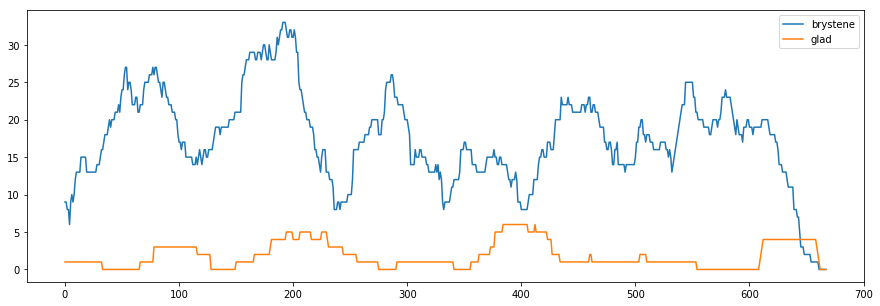

In [38]:
print(nb.metadata(urns[30]))
nb.plot_sammen_vekst(urns[30], [words,gladord]).plot(figsize=(15,5))

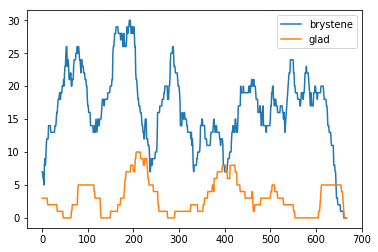

In [78]:
nb.plot_sammen_vekst(urns[30],[words, gladord]).plot()